# Regressão do banco de dados Carros

Autores: Natanael Junior (natmourajr@lps.ufrj.br), Vinicius Mello (viniciusdsmello@poli.ufrj.br) e Pedro Lisboa (pedrohblisboa@gmail.com)

LPS - Laboratório de Processamento de Sinais
<center><img src="../data/logo_lps.jpg"></center>

In [1]:
%time
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 0 ns


In [2]:
%time
df = pd.read_csv('../data/cars.csv')

Wall time: 0 ns


In [3]:
df.head()

,age,gender,avr_per_day,debt,income,price
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


### Informações sobre o banco de dados
Os dados são dados simulados contento:
 - age: idade do comprador
 - gender: genero
 - avr_per_day: quantidade de milhas média rodadas em um dia
 - debt: quantidade de débito que o comprador tem
 - income: renda mensal
 - price: valor pago

In [4]:
col_list = df.columns.tolist()
col_list.remove('price')
data = df[col_list]
trgt = df['price']
trgt = trgt[:,np.newaxis]

### Obs: 
a rede neural trabalha com matemática vetorial, ou seja, precisa de matrizes em sua saída! Por isso, o ```np.newaxis```

In [5]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense

nfolds = 4
foldshandler = KFold(n_splits=nfolds)

for ifold,(trainId,testId) in enumerate(foldshandler.split(data)):
    if ifold != 0: break
        
    data_scaler = MinMaxScaler().fit(data.values[trainId])
    trgt_scaler = MinMaxScaler().fit(trgt[trainId])
    
    norm_data = data_scaler.transform(data)
    norm_trgt = trgt_scaler.transform(trgt)
    
    model = Sequential()
    model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    model.summary()
    
    history = model.fit(norm_data, norm_trgt, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\jupyterlab\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\jupyterlab\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\jupyterlab\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\ju

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


W0826 13:35:20.908923  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\jupyterlab\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 770 samples, validate on 193 samples
Epoch 1/150
770/770 [==============================] - 1s 1ms/step - loss: 0.2305 - mean_squared_error: 0.2305 - mean_absolute_error: 0.3688 - val_loss: 0.2204 - val_mean_squared_error: 0.2204 - val_mean_absolute_error: 0.3623
Epoch 2/150
770/770 [==============================] - 0s 104us/step - loss: 0.2061 - mean_squared_error: 0.2061 - mean_absolute_error: 0.3399 - val_loss: 0.1898 - val_mean_squared_error: 0.1898 - val_mean_absolute_error: 0.3259
Epoch 3/150
770/770 [==============================] - 0s 37us/step - loss: 0.1729 - mean_squared_error: 0.1729 - mean_absolute_error: 0.3056 - val_loss: 0.1536 - val_mean_squared_error: 0.1536 - val_mean_absolute_error: 0.2872
Epoch 4/150
770/770 [==============================] - 0s 41us/step - loss: 0.1356 - mean_squared_error: 0.1356 - mean_absolute_error: 0.2727 - val_loss: 0.1132 - val_mean_squared_error: 0.1132 - val_mean_absolute_error: 0.2505
Epoch 5/150
770/770 [=====================

Mostrar a evolução do treinamento

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


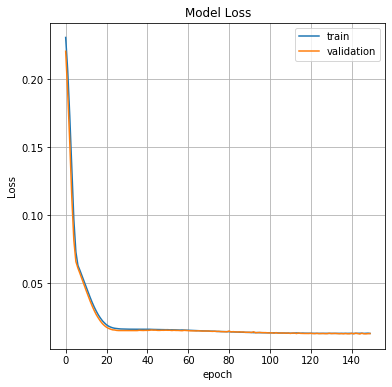

In [6]:
print(history.history.keys())

fig = plt.figure(figsize=(6,6))

ax = plt.subplot(1,1,1)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='best')
ax.grid()

Text(0.5, 0, 'Output')

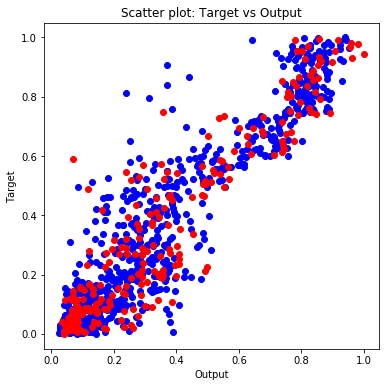

In [7]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

pred_trgt = model.predict(norm_data)

ax.plot(pred_trgt[trainId],norm_trgt[trainId],'bo')
ax.plot(pred_trgt[testId],norm_trgt[testId],'ro')
ax.set_title('Scatter plot: Target vs Output')
ax.set_ylabel('Target')
ax.set_xlabel('Output')

In [8]:
df_out = pd.DataFrame(np.append(norm_trgt,pred_trgt,axis=1), columns=['target','output'])

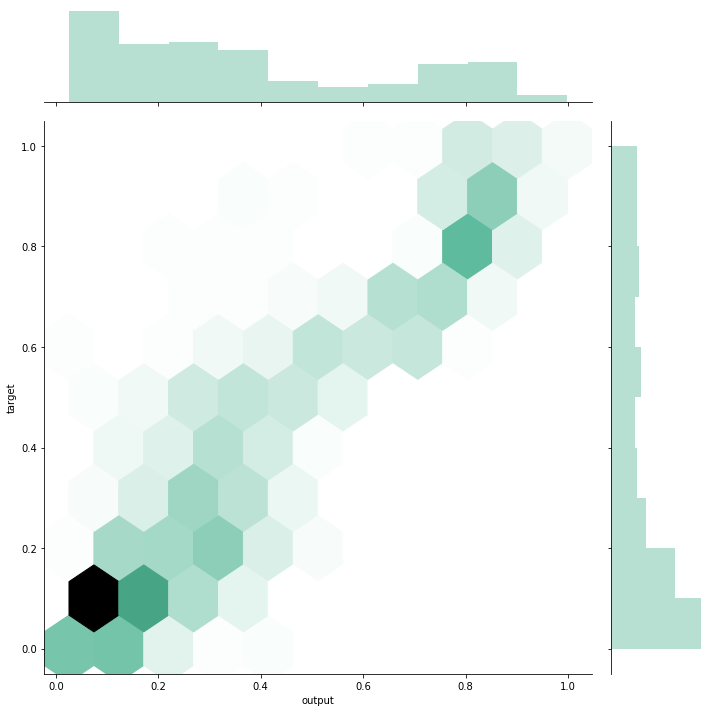

In [9]:
sns.jointplot(x=df_out['output'], y=df_out['target'], kind="hex", color="#4CB391",height=10);

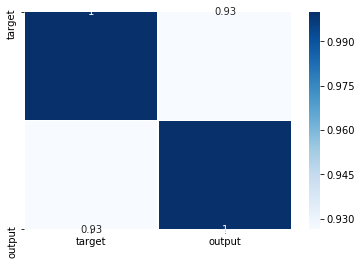

In [10]:
hm = sns.heatmap(df_out.corr(),annot = True, linewidths=.5, cmap='Blues')

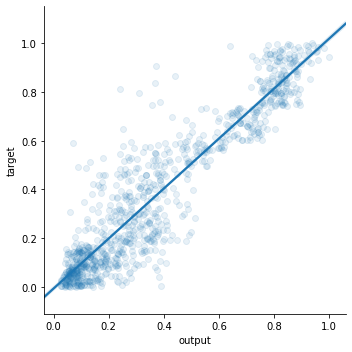

In [11]:
sns.lmplot(x = 'output', y = 'target', data = df_out,
          scatter_kws = {'alpha':0.1},);

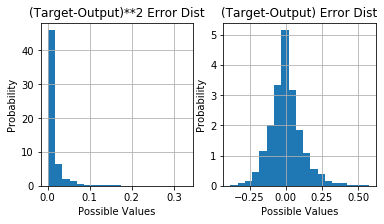

In [12]:
fig = plt.figure(figsize=(6,3))

n_bins = 20
ax = plt.subplot(1,2,1)

mse_values = (df_out['target'].values - df_out['output'].values)**2

bins = np.linspace(mse_values.min(),mse_values.max(),n_bins)
n, bins, patches = ax.hist(mse_values,bins=bins, density=True)
ax.set_title('(Target-Output)**2 Error Dist')
ax.set_ylabel('Probability')
ax.set_xlabel('Possible Values')
ax.grid()

ax = plt.subplot(1,2,2)

mae_values = (df_out['target'].values - df_out['output'].values)

bins = np.linspace(mae_values.min(),mae_values.max(),n_bins)
n, bins, patches = ax.hist(mae_values,bins=bins, density=True)
ax.set_title('(Target-Output) Error Dist')
ax.set_ylabel('Probability')
ax.set_xlabel('Possible Values')
ax.grid()


Podemos estimar o perfil de compra de um usuário ficticio.

In [13]:
new_data = np.array([[30, 0, 26, 10, 4000]])
norm_new_data = data_scaler.transform(new_data)
predicted = model.predict(norm_new_data)
print('Data: ', new_data, ' Price: ',trgt_scaler.inverse_transform(predicted))

Data:  [[  30    0   26   10 4000]]  Price:  [[3755.853]]
